In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [2]:
train_path = 'train'
test_path = 'test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 898 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
images, labels = next(train_batches) 

In [5]:
images.shape

(10, 224, 224, 3)

In [6]:
labels.shape

(10, 2)

In [7]:
train_batches.class_indices

{'cat': 0, 'dog': 1}

### Models
* CNN
* Transfer Learning(VGG16)
* Transfer Learning(VGG16) with add some layers
* Transfer Learning(Model-net)
* Transfer Learning(Model-net) with add some layers

#### 1- CNN

#### 2- Transfer Learning(VGG16)

In [10]:
vgg16 = tf.keras.applications.vgg16.VGG16()

In [11]:
type(vgg16)

keras.src.models.functional.Functional

In [12]:
model = keras.Sequential()

for layer in vgg16.layers[:-1]:
    model.add(layer)

In [13]:
for layer in model.layers:
    layer.trainable = False

In [14]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_batches, validation_data=test_batches, steps_per_epoch=4, validation_steps=4, epochs=50, verbose=2)

Epoch 1/50


C:\Users\omar\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 - 11s - 3s/step - accuracy: 0.5000 - loss: 1.0590 - val_accuracy: 1.0000 - val_loss: 0.0985
Epoch 2/50
4/4 - 8s - 2s/step - accuracy: 0.6500 - loss: 0.7959 - val_accuracy: 0.6250 - val_loss: 0.6294
Epoch 3/50
4/4 - 6s - 2s/step - accuracy: 0.9000 - loss: 0.4486 - val_accuracy: 1.0000 - val_loss: 0.1607
Epoch 4/50


c:\Users\omar\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 - 8s - 2s/step - accuracy: 0.7000 - loss: 0.5786 - val_accuracy: 1.0000 - val_loss: 0.1644
Epoch 5/50
4/4 - 8s - 2s/step - accuracy: 0.8000 - loss: 0.4352 - val_accuracy: 0.9000 - val_loss: 0.3073
Epoch 6/50
4/4 - 6s - 1s/step - accuracy: 0.8500 - loss: 0.3256 - val_accuracy: 1.0000 - val_loss: 0.1295
Epoch 7/50
4/4 - 8s - 2s/step - accuracy: 0.8250 - loss: 0.4393 - val_accuracy: 1.0000 - val_loss: 0.2385
Epoch 8/50
4/4 - 7s - 2s/step - accuracy: 0.8421 - loss: 0.4036 - val_accuracy: 0.9750 - val_loss: 0.2519
Epoch 9/50
4/4 - 6s - 1s/step - accuracy: 0.8250 - loss: 0.3826 - val_accuracy: 1.0000 - val_loss: 0.0749
Epoch 10/50
4/4 - 8s - 2s/step - accuracy: 0.9500 - loss: 0.2162 - val_accuracy: 0.9000 - val_loss: 0.3322
Epoch 11/50
4/4 - 8s - 2s/step - accuracy: 0.9000 - loss: 0.2917 - val_accuracy: 0.7500 - val_loss: 0.4368
Epoch 12/50
4/4 - 6s - 1s/step - accuracy: 0.9000 - loss: 0.2206 - val_accuracy: 0.9500 - val_loss: 0.1448
Epoch 13/50
4/4 - 9s - 2s/step - accuracy: 0.9250 - lo

In [17]:
model.save('transfar_learning_vgg16_1_95.h5')

In [26]:
# Evaluate the model
model1 = keras.models.load_model('transfar_learning_vgg16_1_95.h5')
loss, accuracy = model1.evaluate(test_batches)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 938ms/step - accuracy: 0.9890 - loss: 0.1341
Test Loss: 0.14017492532730103
Test Accuracy: 0.9700000286102295


In [1]:
# # Plotting the results
# # Get training and validation loss
# loss = model.history['loss']
# val_loss = model.history['val_loss']

# # Get training and validation accuracy
# accuracy = model.history['accuracy']
# val_accuracy = model.history['val_accuracy']

# # Create a range of epochs
# epochs = range(1, len(loss) + 1)

# # Plot training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(epochs, accuracy, 'b', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# # Show the plots
# plt.tight_layout()
# plt.show()

#### 3- Transfer Learning(VGG16) with add some layers

In [37]:
from tensorflow.keras.applications import VGG16

# Load VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [38]:
for layer in base_model.layers:
    layer.trainable = False


In [39]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))


In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


history = model.fit(train_batches, epochs=2, validation_data=test_batches)


Epoch 1/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9956 - loss: 0.0198 - val_accuracy: 0.9600 - val_loss: 0.1015
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9974 - loss: 0.0171 - val_accuracy: 0.9700 - val_loss: 0.0878


In [54]:
model.save('transfar_learning_vgg16_withlayers_99_97.h5')

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 979ms/step - accuracy: 0.9654 - loss: 0.0894
Test Loss: 0.0878218486905098
Test Accuracy: 0.9700000286102295


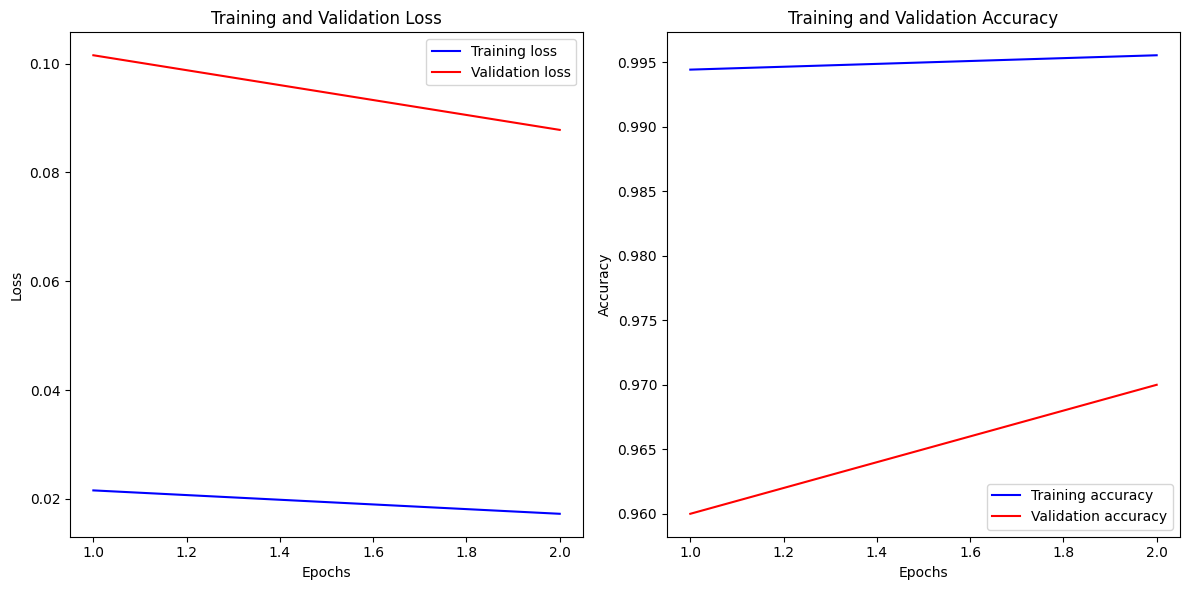

In [50]:
loss, accuracy = model.evaluate(test_batches)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting the results
# Get training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

#### 4-Transfer Learning(Model-net)

In [51]:
mobile_net = tf.keras.applications.mobilenet.MobileNet()

In [52]:
model = keras.Sequential()

for layer in mobile_net.layers[:-1]:
    model.add(layer)

In [53]:
for layer in model.layers:
    layer.trainable = False

In [55]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(train_batches, validation_data=test_batches, steps_per_epoch=4, validation_steps=4, epochs=20, verbose=2)

Epoch 1/20
4/4 - 1s - 334ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9250 - val_loss: 0.3185
Epoch 2/20
4/4 - 1s - 263ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 0.9750 - val_loss: 0.0326
Epoch 3/20
4/4 - 1s - 204ms/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 0.9500 - val_loss: 0.0395
Epoch 4/20


c:\Users\omar\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 - 1s - 271ms/step - accuracy: 0.9250 - loss: 0.1447 - val_accuracy: 0.9250 - val_loss: 0.2230
Epoch 5/20
4/4 - 1s - 256ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9750 - val_loss: 0.0320
Epoch 6/20
4/4 - 1s - 223ms/step - accuracy: 1.0000 - loss: 3.7943e-04 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 7/20
4/4 - 1s - 282ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9250 - val_loss: 0.1983
Epoch 8/20
4/4 - 1s - 259ms/step - accuracy: 0.9750 - loss: 0.0796 - val_accuracy: 0.9750 - val_loss: 0.0375
Epoch 9/20
4/4 - 1s - 195ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 10/20
4/4 - 1s - 260ms/step - accuracy: 0.9500 - loss: 0.2124 - val_accuracy: 0.9750 - val_loss: 0.0416
Epoch 11/20
4/4 - 1s - 255ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 12/20
4/4 - 1s - 198ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 13/20
4/4 - 1s - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.9437 - loss: 0.1216
Test Loss: 0.09030523151159286
Test Accuracy: 0.9599999785423279


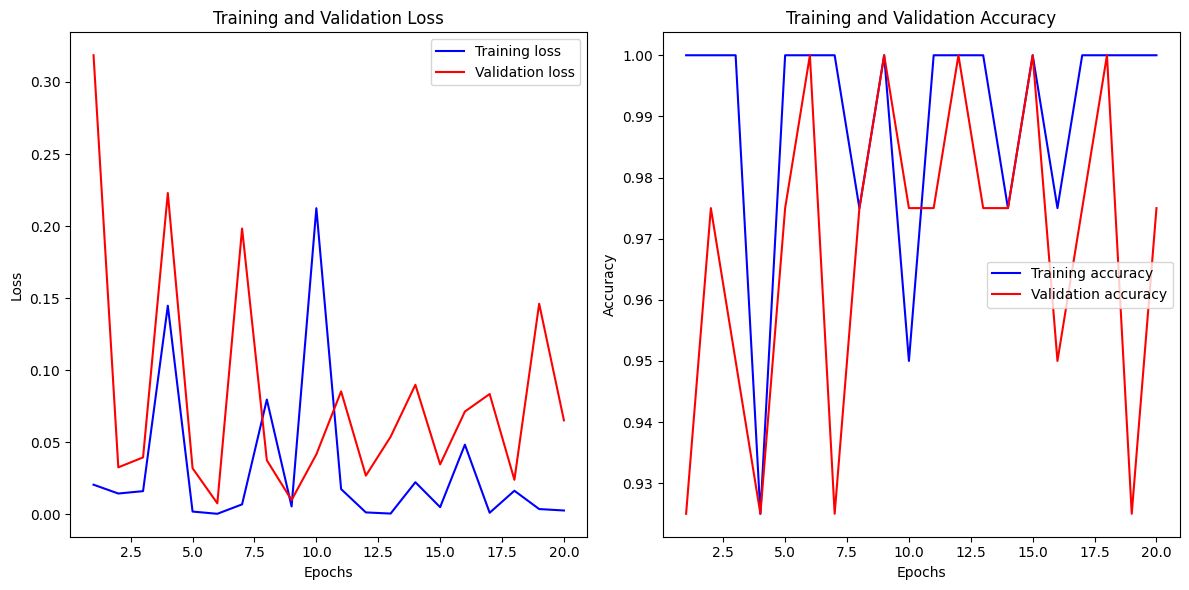

In [62]:
loss, accuracy = model.evaluate(test_batches)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting the results
# Get training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [63]:
model.save('transfar_learning_mobile_net_1_97.h5')

#### 5- Transfer Learning(Model-net) with add some layers